# 项目一-线性回归

## 1.导入我们要用到的库

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt #画图的库

## 2.创建我们线性回归的数据

In [2]:
x = torch.arange(-1,1,0.02).unsqueeze(1)
y = 2 * x + 3 + torch.randn(x.size()) * 0.1 #加上随机数来添加y轴的噪点.

(100, 100)

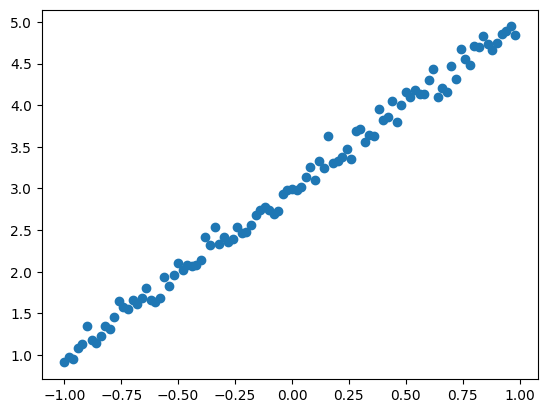

In [3]:
#可视化数据
plt.scatter(x,y) ## 以点的形式来展示它
len(x),len(y)

## 3. 创建我们的模型

In [13]:
#如果你是第二次再打开记得运行所有单元格
torch.manual_seed(42)
class Linear_Regression_Model(nn.Module):
    def __init__(self):
        super(Linear_Regression_Model, self).__init__()
        #我们希望画一条直线来拟合它。
        #直线需要什么
        # y = ax + b  
        # y 是输出，x是输入.
        #我们只需要 a和b,
        #其中a一般被称为权重weight(w),b是偏置(bias)
        # self.a = nn.Parameter(torch.randn(1,1,requires_grad=True))
        # self.b = nn.Parameter(torch.randn(1,1,requires_grad=True)) 
        self.linear = nn.Linear(1,1)
    def forward(self, x):
        #y = self.a * x + self.b
        y = self.linear(x)
        return y

model = Linear_Regression_Model()
loss_fn = nn.MSELoss() #这是损失函数
optimizer = optim.SGD(params=model.parameters(),lr=0.01) # 自动求导并且计算（不需要自己算）。梯度下降，来使得loss变小，就是直线拟合

## 4.训练模型和评估

In [14]:
epochs = 1000

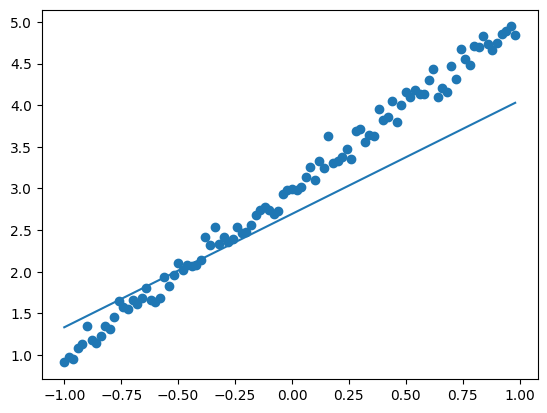

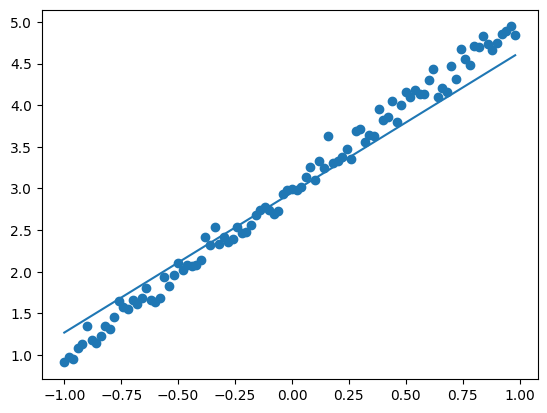

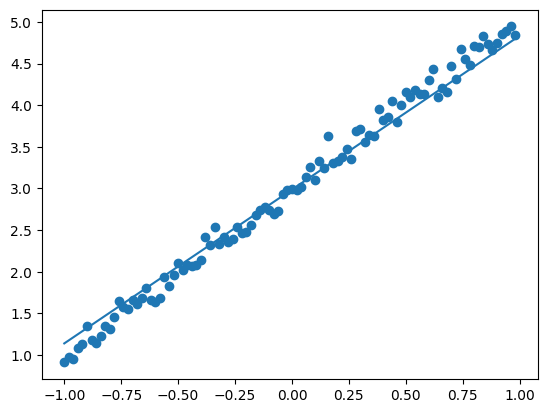

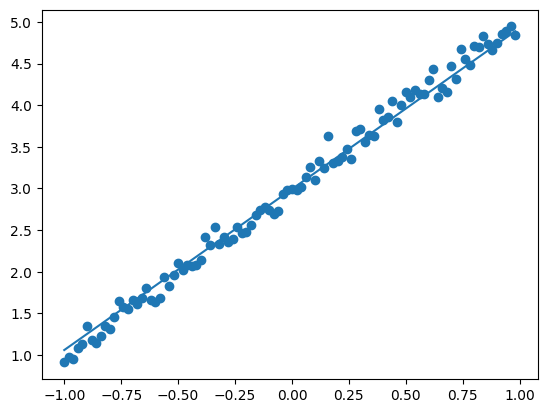

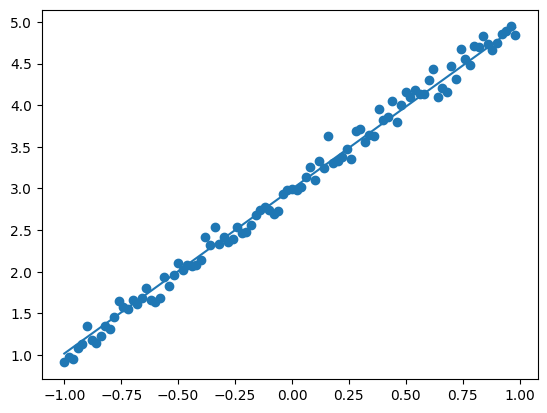

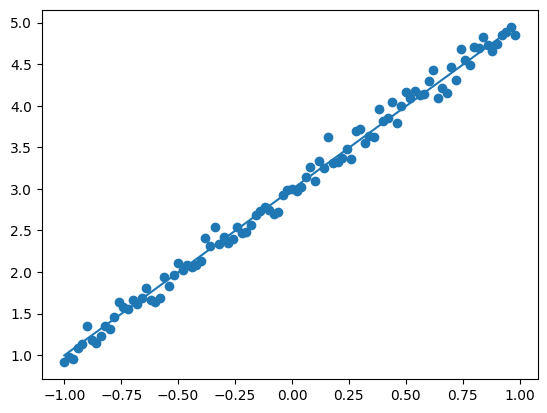

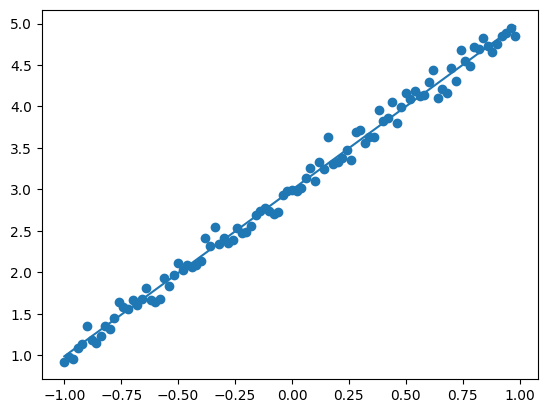

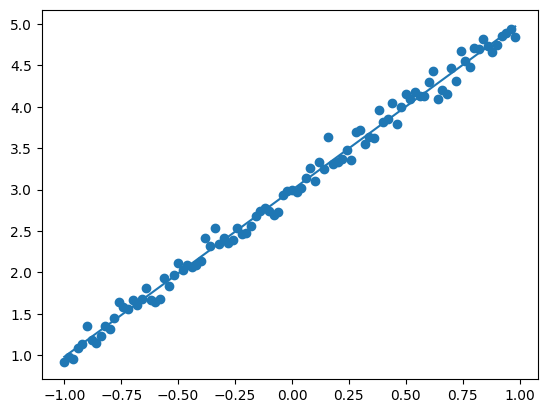

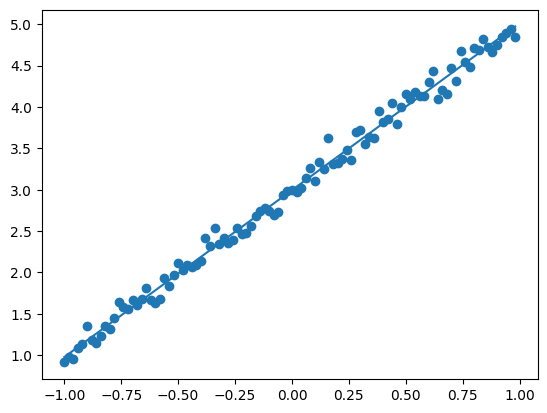

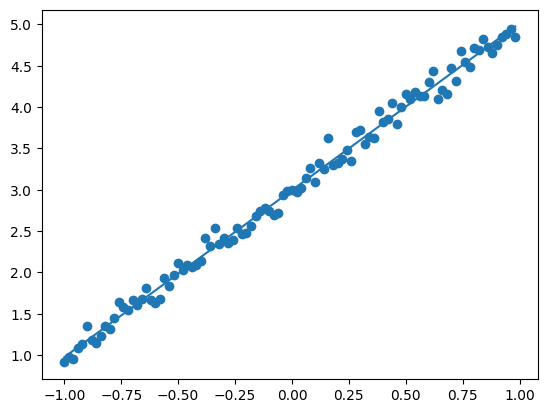

In [15]:
for epoch in range(epochs):
    y_pred = model(x) #把创建的x传进模型
    loss = loss_fn(y_pred,y)

    optimizer.zero_grad() #遍历所有的计算过程中的gradient 一次计算
    loss.backward() #反向传播
    optimizer.step() #更新参数
    if  (epoch+1)%100==0:
       plt.scatter(x.data.numpy(),y.data.numpy())
       plt.plot(x.data.numpy(),y_pred.data.numpy())
       plt.show()
    #lr一般先大后小，但很多时候，默认值是很好的

## 5.保存模型并且再加载

In [11]:
## 模型在内存里面，退出重开，就丢失了.
## 放到硬盘里面，可以以后直接使用，也可以继续训练
torch.save(model.state_dict(),"./models/linear.pth")

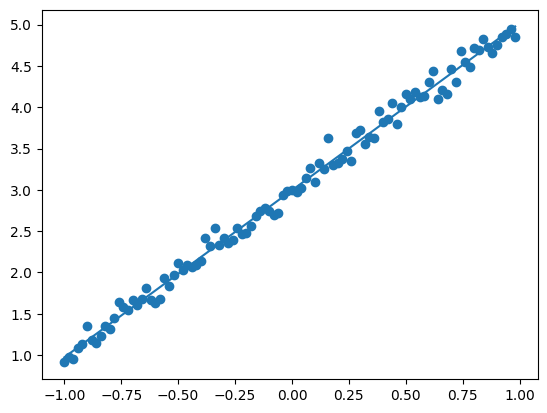

In [12]:
y_pred = model(x) #把创建的x传进模型
plt.scatter(x.data.numpy(),y.data.numpy())
plt.plot(x.data.numpy(),y_pred.data.numpy())

## 6.总结

In [9]:
## 我们用numpy创建了数据集，加了噪点

## 创建我们的模型，里面实际上只有两个参数 a , b
## 而像这样的a , b . y = a*x + b 也有专门的函数封装，没有必要自己写。
## nn.Linear(输入维度,输出维度) 创建十六组y = ax+b 的映射.达到的效果是一样的.

## 还有，loss_fn和loss. 

## 训练正常顺序:
#    optimizer.zero_grad() #遍历所有的计算过程中的gradient 一次计算一个梯度值
#    loss.backward() #反向传播
#    optimizer.step() #更新参数